# 파이썬 기반의 AI를 위한 기초수학, 확률및통계

In [1]:
## 강봉주 
## bonjour.kang@gmail.com
##
## 특별한 분포
##

In [2]:
# 필요한 패키지
import numpy as np
import matplotlib.pyplot as plt

import scipy
from scipy import linalg as la
import scipy.stats as ss
import scipy.special

# 한글출력
plt.rcParams['font.family'] = 'Malgun Gothic' #  Windows 'Malgun Gothic' 
plt.rcParams['axes.unicode_minus'] = False

# 필요한 패키지 2
from pgmpy.factors.discrete import JointProbabilityDistribution as JPD
import sympy

scipy.__version__

'1.15.3'

## 베르누이 분포
- 정의 : 시행이 1회  (단일 시행) 성공(1) 또는 실패(0) 중 하나의 결과만 발생하는 이산 확률 분포
- 확률값 표현 : PMF (확률질량함수)
  + P(X=1) = p (성공 확률)
  + P(X=0) = 1 - p (실패 확률)
  + 기대값(평균) : E[X] = p
  + 분산 VAR(X) = p(1-p)
- 활용 사례
  + 품질 검사 (합격/불)
  + 이메일 분류 (스팸/정상)
  + 광고 클릭 여부
  + 이진 결과를 갖는 상황에서 모두 사용

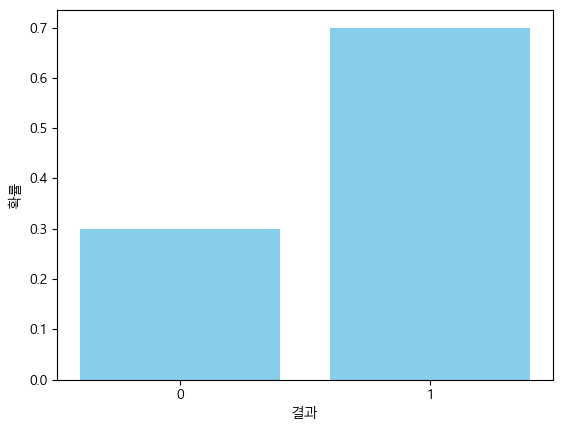

In [5]:
from scipy.stats import bernoulli
import matplotlib.pyplot as plt

# 성공 확률 설정
p = 0.7
rv = bernoulli(p) # 모델 인스턴스화

# 확률 질량 함수 PMF 시각화
x = [0,1]
pmf = rv.pmf(x) # 모델링

# 시각화
fig,ax = plt.subplots()
ax.bar(x, pmf, color = 'skyblue')
ax.set_xticks(x)
ax.set_xlabel('결과')
ax.set_ylabel('확률')
plt.show()

## 베르누이 분포 문제

- 특정한 광고를 본 사용자가 클릭할 확률이 10%라 가정
- 1000명이 봄

# 이항분포
- 정의 : 베르누이 분포의 연장선에 있다.
  + 동일한 확률 p를 가지는 베르누이 시행을 n번 반복했을 때, 성공한 횟수를 따르는 분포
- 조건 :
  + 각 시행은 오직 성공(1) 또는 실패(0) 중 하나의 결과만 가진다.
  + 시행은 서로 독립적이다.
  + 성공 확률 p는 매 시행마다 일정하다
  + 시행 횟수 n은 고정되어 있다.

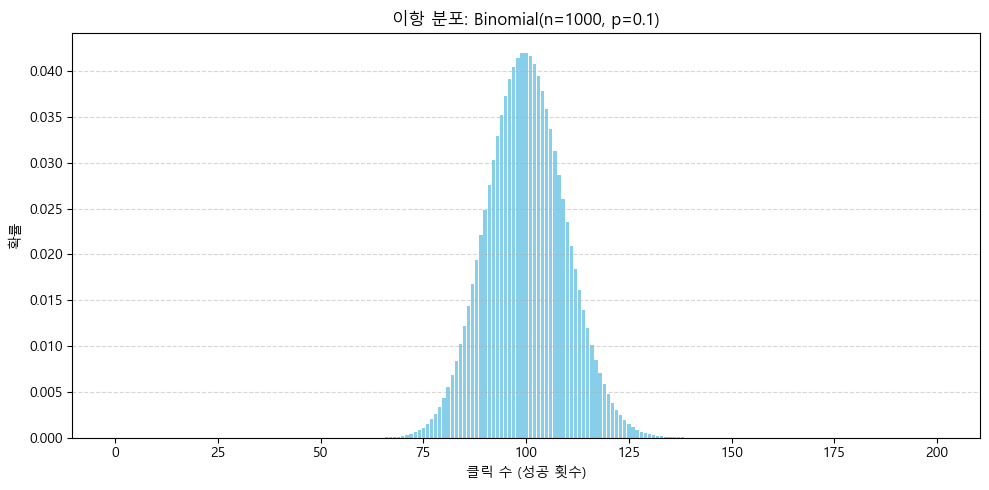

In [12]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html#scipy.stats.binom
# 광고를 본 사용자 수 n = 1000
# 클릭 확률 p = 0.1, x~binomial(1000,0.1)
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# 파라미터 설정
n = 1000 # 시행 횟수
p = 0.1 # 성공 확률
x = np.arange(0,201) # 가능한 클릭 성공 횟수 범위

# 이항 분포 객체 생성 # 모델링
bi_dist = binom(n,p)

# 확률 질량 함수 PMF
pmf = bi_dist.pmf(x)

# 시각화 (객체지향 방식)
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(x, pmf, color='skyblue')
ax.set_title(f'이항 분포: Binomial(n={n}, p={p})')
ax.set_xlabel('클릭 수 (성공 횟수)')
ax.set_ylabel('확률')
ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

## 실전 예제
- 시나리오
  + 유권자의 50%가 특정 후보를 지지한다고 알려져 있음
  + 질문 : 30명을 무작위로 뽑아 설문할 때, 지지 응답자가 몇 명일까?
- 기대값, 분산, 표준편차
  + 기대값(np) : 30 * 0.5 
  + 분산 : 30 * 0.5 * (1-0.5)
  + 표준편차 : 2.73

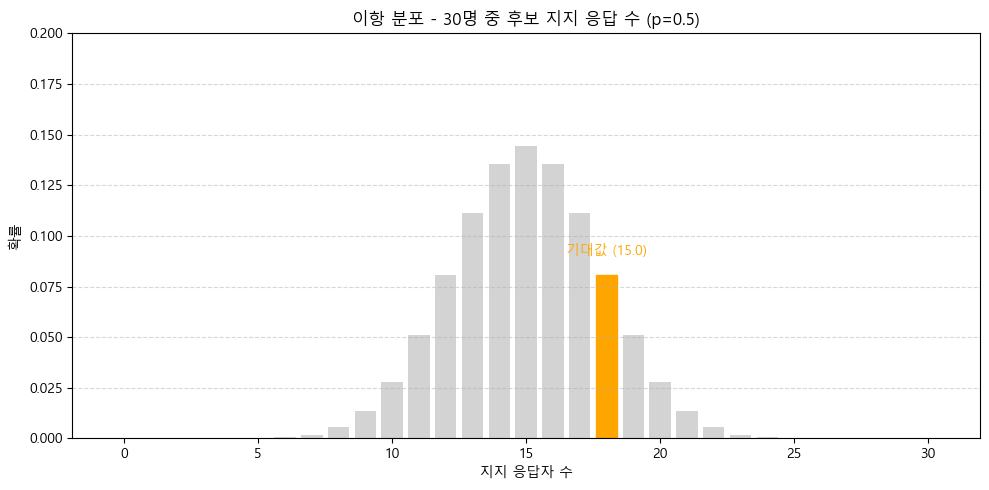

기대값 (E[X]) = 15.0
표준편차 (SD) ≈ 2.74


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

n= 30
p=0.5
x=np.arange(0,  n+1)
bi_dist = binom(n,p)

pmf = bi_dist.pmf(x)

# 시각화
fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(x, pmf, color='lightgray')
bars[18].set_color('orange')  # 기대값 위치 강조

ax.set_title('이항 분포 - 30명 중 후보 지지 응답 수 (p=0.5)')
ax.set_xlabel('지지 응답자 수')
ax.set_ylabel('확률')
ax.grid(axis='y', linestyle='--', alpha=0.5)
ax.text(18, pmf[18] + 0.01, f'기대값 ({n * p})', ha='center', color='orange')
ax.set_ylim(0,0.20)

plt.tight_layout()
plt.show()

# 기대값, 표준편차 출력
print(f"기대값 (E[X]) = {n * p}")
print(f"표준편차 (SD) ≈ {np.sqrt(n * p * (1 - p)):.2f}")

## 품질 관리
- 시나리오 : 생산된 100개의 부품 중 5개가 불량일 확률
- 한 제조 공장에서 생산되는 제품의 불량률은 5%로 알려져있다. 하루 동아 ㄴ생산된 제품 100개 중에서 불량품이 나올 확률을 조사.
- 질문
  + 불량품이 정확히 5개일 확률
  + 불량품이 10개 이상 나올 확률
  + 이 분포 시각화
- X∼Binomial(100,0.05)

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

n=100
p=0.05
x=np.arange(0, 20)

binom_dist = binom(n,p) # 모델 학습
pmf = binom_dist.pmf(x) # 모델 학습 완료
print(binom_dist.pmf(5)) # 정확하게 불량품 5개일 확률 


0.18001782727042887


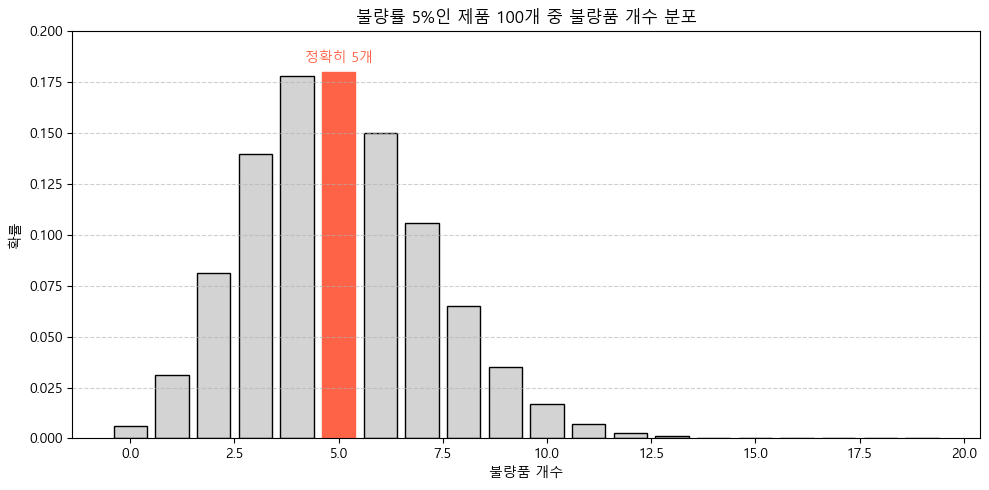

정확히 5개가 불량일 확률: 0.1800
불량품이 10개 이상일 확률: 0.0282


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# 파라미터
n = 100      # 제품 수
p = 0.05     # 불량 확률
x = np.arange(0, 20)  # 관심 있는 불량품 개수 범위

# 이항 분포 객체
binom_dist = binom(n, p)
pmf = binom_dist.pmf(x)

# 시각화
fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(x, pmf, color='lightgray', edgecolor='black')
bars[5].set_color('tomato')  # 5개일 확률 강조

ax.set_title('불량률 5%인 제품 100개 중 불량품 개수 분포')
ax.set_xlabel('불량품 개수')
ax.set_ylabel('확률')
ax.grid(axis='y', linestyle='--', alpha=0.6)
ax.text(5, pmf[5] + 0.005, '정확히 5개', ha='center', color='tomato')
ax.set_ylim(0, 0.20)

plt.tight_layout()
plt.show()

# 확률 계산
prob_5 = binom_dist.pmf(5)
prob_10_or_more = 1 - binom_dist.cdf(9)

print(f"정확히 5개가 불량일 확률: {prob_5:.4f}")
print(f"불량품이 10개 이상일 확률: {prob_10_or_more:.4f}")

# 시나리오
- 로또 1등 확률 기반 이항분포 만들기 (1년)

In [ ]:
from scipy.stats import binom
import numpy as np
import matplotlib.pyplot as plt

# 로또 파라미터
n = 52
p = 1 / 8_145_060

# 이항 분포 모델
dist = binom(n=n, p=p)
x = np.arange(0, 5)  # 0 ~ 4회 당첨
pmf = dist.pmf(x)

# x축 레이블 생성
labels = [f"{i}회 당첨" for i in x]

# 시각화
fig, ax = plt.subplots()
bars = ax.bar(x, pmf, color='orchid')
ax.set_title('로또 1등 이항분포 (1년 동안 52회 구매)')
ax.set_xlabel('1등 당첨 횟수')
ax.set_ylabel('확률')
ax.set_ylim(0, max(pmf) * 1.2)
ax.set_xticks(x)
ax.set_xticklabels(labels)

# 확률 출력
print(f"0회 당첨 확률: {pmf[0]:.10f}")
print(f"1회 당첨 확률: {pmf[1]:.10f}")
print(f"2회 당첨 확률: {pmf[2]:.10f}")
print(f"3회 당첨 확률: {pmf[3]:.10f}")

## 중심극한정리 CTL
- N이 충분히 크면, 이항분포도 정규분포에 근사한다.
- 이항 분포에 한정) 정규분포 근사 조건
  + np >= 5 and n(1-p)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, norm
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# (정규 근사 가능) n=100, p=0.5
n1, p1 = 100, 0.5
mu1 = n1 * p1
sigma1 = np.sqrt(n1 * p1 * (1 - p1))
x1 = np.arange(0, n1 + 1)
binom_pmf1 = binom.pmf(x1, n1, p1)
norm_pdf1 = norm.pdf(x1, mu1, sigma1)

# (정규 근사 부적절) n=20, p=0.1 # 여기 숫자 변경하기
n2, p2 = 2000, 0.00001
mu2 = n2 * p2
sigma2 = np.sqrt(n2 * p2 * (1 - p2))
x2 = np.arange(0, n2 + 1)
binom_pmf2 = binom.pmf(x2, n2, p2)
norm_pdf2 = norm.pdf(x2, mu2, sigma2)

# 왼쪽: 정규 근사 적합
axes[0].bar(x1, binom_pmf1, alpha=0.6, label='이항분포 B(100, 0.5)')
axes[0].plot(x1, norm_pdf1, 'r--', label='정규분포 근사')
axes[0].set_title('✔ 정규분포로 잘 근사됨 (n=100, p=0.5)')
axes[0].legend()
axes[0].grid(True)

# 오른쪽: 정규 근사 부적절
axes[1].bar(x2, binom_pmf2, alpha=0.6, label='이항분포 B(20, 0.1)')
axes[1].plot(x2, norm_pdf2, 'r--', label='정규분포 근사')
axes[1].set_title('✖ 정규분포 근사 부적절 (n=20, p=0.1)')
axes[1].legend()
axes[1].grid(True)

fig.suptitle('이항분포와 정규분포 근사의 비교 (중심극한정리 관점)', fontsize=15)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# 포아송 분포
- 어떤 사건이 일정하게 평균 속도로, 독립적으로 발생할 때 그 횟수를 나타내는 분포
- 예시
  + 1시간 동안 콜센터에 걸려오는 전화 수
  + 1km 구간에서 발생하는 교통 사고 수
  + 1분간 웹사이트에 접속하는 사용자 수
- 확률 질량 함수 (PMF)
$$
P(X = k) = \frac{e^{-\lambda} \cdot \lambda^k}{k!}
$$ 
- 용어
    + $X$ : 단위 시간(혹은 공간) 내 발생한 사건 수 (0, 1, 2, …)
    + $\lambda$ : 평균 발생 횟수
    + $k$ : 실제 관측된 횟수
    + $e$ : 자연상수 $e \approx 2.718$

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import poisson

# 평균 발생 횟수 설정
lmbda = 4
x = np.arange(0, 15) # 구간, 시간, 공간

# 모델링
pmf = poisson.pmf(x, lmbda)

# 시각화
fig, ax = plt.subplots()
ax.bar(x, pmf, color='skyblue', edgecolor='black')
ax.set_title(f'포아송 분포 (λ={lmbda})')
ax.set_xlabel('발생 횟수')
ax.set_ylabel('확률')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# 1행 5열 정적 비교 그래프 (λ 값에 따른 포아송 분포 변화)
fig, axes = plt.subplots(1, 5, figsize=(20, 4), sharey=True)
lambdas = [1, 2, 4, 8, 12]
x = np.arange(0, 25)

for ax, lmbda in zip(axes, lambdas):
    pmf = poisson.pmf(x, mu=lmbda)
    ax.bar(x, pmf, color='skyblue', edgecolor='black')
    ax.set_title(f'λ = {lmbda}')
    ax.set_xlabel('k')
    ax.grid(axis='y', linestyle='--', alpha=0.5)

axes[0].set_ylabel('P(X = k)')
plt.tight_layout()
plt.show()

In [ ]:
# 시각화
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(x, pmf, color='skyblue', edgecolor='black')
ax.set_title(f'웹 서버 요청 수의 포아송 분포 (λ = {lmbda})')
ax.set_xlabel('1초 동안 요청 수 (건)')
ax.set_ylabel('확률 P(X = k)')
ax.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [10]:
# bernolli 클래스의 내장 메서드
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bernoulli.html

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli

# 성공 확률 (광고 클릭 확률)
p = 0.1
n_users = 1000

# 모델링
b_dist = bernoulli(p) # 모델 인스턴스화

# 사용자별 광고 클릭 여부 시뮬레이션 # 예측
clicks = b_dist.rvs(size=n_users) # 예측
n_clicks = np.sum(clicks)
print(n_clicks, n_clicks / n_users)

103 0.103


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# 누적 시간: 10초
lambda_per_sec = 50
total_lambda = lambda_per_sec * 10  # 10초 동안 평균 요청 수

x = np.arange(400, 600)  # 관측 가능한 요청 수 범위
pmf = poisson.pmf(x, mu=total_lambda)

# 시각화
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(x, pmf, color='cornflowerblue', edgecolor='black')
ax.set_title(f'10초 동안 웹 서버 요청 수 포아송 분포 (λ = {total_lambda})')
ax.set_xlabel('10초간 총 요청 수 (건)')
ax.set_ylabel('확률 P(X = k)')
ax.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 확률 계산 예시
prob_500 = poisson.pmf(500, mu=total_lambda)
prob_over_550 = 1 - poisson.cdf(549, mu=total_lambda)

prob_500, prob_over_550

In [ ]:
from scipy.stats import poisson

lambda_total = 500
threshold_prob = 0.01

# 상한선을 만족하는 최소 요청 수 찾기
k = poisson.isf(threshold_prob, mu=lambda_total)  # inverse survival function

print(f"경고 임계 요청 수: {int(k)}건 이상이면 개발자에게 알림")

# 기하분포
- 성공할 때까지 실패한 횟수를 모델링하는 분포
- 베르누이 개념 포함
  + 성공확률 p, 실패 확률 1-p
- 실생활 예시
  + 광고 전화 연결이 성공하기까지 걸린 콜 횟수
  + 웹 마케팅 광고 클릭이 처음 발생하기까지의 사용자 수

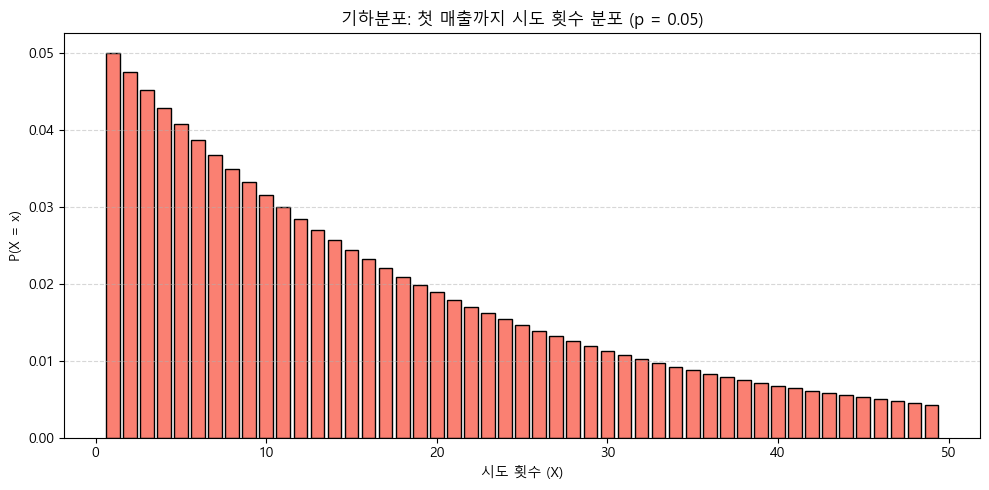

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import geom

# 매출 발생 확률 p
p = 0.05 # 5%의 구매 전환율
x = np.arange(1,50) # 시도 횟수
pmf = geom.pmf(x,p)

# 시각화 (객체지향 방식)
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(x, pmf, color='salmon', edgecolor='black')
ax.set_title('기하분포: 첫 매출까지 시도 횟수 분포 (p = 0.05)')
ax.set_xlabel('시도 횟수 (X)')
ax.set_ylabel('P(X = x)')
ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

## 시나리오
- 마케팅 전환 모델
- 시도 횟수 + 광고 단가 + 목표 매출액을 결합하여 예상 마케팅 비용 추정 모델 개발
- 시나리오
  + 광고 전환 시도 수 모델링 : 기하분포
  + 광고 1회 단가 : 예상 변수
  + 목표 매출액 설정 : 원하는 기준
  + => 총 필요 광고 클릭 수 => 총 마케팅 비용 도출

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import geom

# 설정 값 정의
p = 0.02 # 전환율 1번 광고 클릭 시, 구매로 이어질 확률 2%
ad_cost_per_click = 200 # 광고 1회 클릭당 비용 (원)
unit_price = 20000
target_sales_amount = 2000000

# 마케팅 비용 계산
expected_trials_per_sale = 1 / p # 한명의 구매자가 생기기까지 필요한 ㅕㅇ균 클릭 수 (기하분포의 기댓값)
required_sales = target_sales_amount / unit_price # 목표 매출을 위해 필요한 구매자 수
expected_total_clicks = required_sales * expected_trials_per_sale # 총필요한 클릭 수 (기대값 기반)
expected_total_cost = expected_total_clicks * ad_cost_per_click # 총 예상 광고비 (클릭당 비율 x 총 클릭수)

# 결과 출력
print(f"목표 매출액: {target_sales_amount:,.0f}원")
print(f"필요한 구매 수: {required_sales:.0f}명")
print(f"기대 클릭 수 (기하분포 기반): {expected_total_clicks:.0f}회")
print(f"예상 마케팅 비용: {expected_total_cost:,.0f}원")

# 기하분포 시각화
x = np.arange(1, 60)
pmf = geom.pmf(x, p)

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(x, pmf, color='salmon', edgecolor='black')
ax.set_title(f'기하분포: 첫 구매까지 시도 횟수 (p = {p})')
ax.set_xlabel('시도 횟수 (광고 클릭 수)')
ax.set_ylabel('P(X = x)')
ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [3]:
# 표본의 개수: 10
trials = 1
event_prob = 1/6
size = 10
np.random.seed(123)
result = np.random.binomial(n=trials,p=event_prob, size=size)
result

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [4]:
# 성공 건수
np.sum(result)

1

## 이항 분포

$Pr(Y=y)=f(y)=$
$\begin{pmatrix}
n \\
y
\end{pmatrix}$ 
$p^{y} (1-p)^{n-y}$ 
$y=0, ..., n$

In [5]:
# 예제의 해답
A = [2, 3]
trials = 5
scipy.special.comb(trials, A)

array([10., 10.])

In [6]:
# 확률밀도 함수 확인
trials = 5
A = np.arange(0, 6)
event_prob = 1/3

ss.binom.pmf(A, n=trials, p=event_prob).sum().round(3)

1.0

In [7]:
# 적률 생성 함수를 이용한 이항 분포의 평균과 분산
p, t, n = sympy.symbols('p, t, n')
expr = ((1-p)+p*sympy.exp(t))**n

# 1차 적률(기대값)
M1 = sympy.Lambda(t, expr.diff(t).simplify())
EX = M1(0)
EX

n*p

In [8]:
# 2차 적률
M2 = sympy.Lambda(t, expr.diff(t, t).simplify())
EXX = M2(0)
EXX

n*p*(n*p - p + 1)

In [9]:
# 분산
(EXX- EX**2).simplify()

n*p*(1 - p)

## 정규 분포

$ f(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}} $, $-\infty < x < \infty$

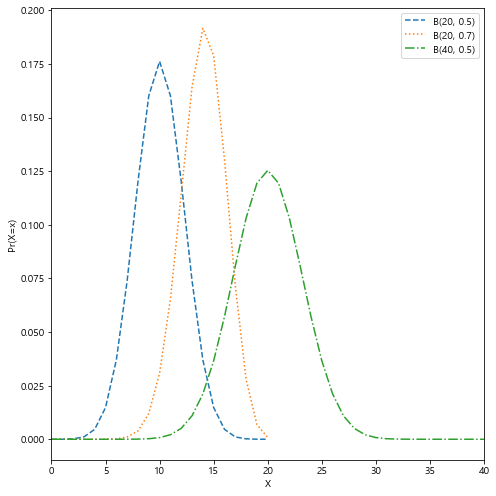

In [10]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_xlim(0, 40)
ax.plot(np.arange(21),ss.binom.pmf(np.arange(21), n=20, p=0.5), ls='--',  label='B(20, 0.5)')
ax.plot(np.arange(21),ss.binom.pmf(np.arange(21), n=20, p=0.7), ls=':',  label='B(20, 0.7)')
ax.plot(np.arange(41),ss.binom.pmf(np.arange(41), n=40, p=0.5), ls='-.',  label='B(40, 0.5)')
ax.set_xlabel("X")
ax.set_ylabel("Pr(X=x)")
ax.legend()

plt.tight_layout()

In [11]:
# 확률값 구하기
np.round(ss.norm.cdf(1) - ss.norm.cdf(-1), 3)

0.683

In [12]:
np.round(ss.norm.cdf(2) - ss.norm.cdf(-2), 3)

0.954

In [13]:
np.round(ss.norm.cdf(3) - ss.norm.cdf(-3), 3)

0.997

In [14]:
# 특정 구간의 확률 계산
np.round(ss.norm.cdf(3) - ss.norm.cdf(-1), 3)

0.84